In [1]:
#Lectura de datos  
import pandas as pd

#Leer datos desde una hoja de excel y seleccionando la hoja
df = pd.read_excel('C:/Users/Daniel/Documents/Universidad Nacional/Diplomado IA/Bases/Copia de Indicadores de Mercado.xlsx', sheet_name='Bolsa')

In [2]:
#Seleccionando las columnas que se van a utilizar
# se seleccionan las columnas desde la 0 hasta la 37
df = df.iloc[:,0:38]

In [3]:
#Establecer la fecha como indice
df = df.set_index('Fecha')

In [34]:
#Cambiar el formato a fecha del indice
df.index = pd.to_datetime(df.index)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1370 entries, 2018-01-02 to 2023-04-21
Data columns (total 37 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ICE Brent 01M   1370 non-null   float64
 1   ICE Brent 02M   1370 non-null   float64
 2   ICE Brent 03M   1370 non-null   float64
 3   ICE Brent 04M   1370 non-null   float64
 4   ICE Brent 05M   1370 non-null   float64
 5   ICE Brent 06M   1370 non-null   float64
 6   ICE Brent 07M   1370 non-null   float64
 7   ICE Brent 08M   1370 non-null   float64
 8   ICE Brent 09M   1370 non-null   float64
 9   ICE Brent 10M   1370 non-null   float64
 10  ICE Brent 11M   1370 non-null   float64
 11  ICE Brent 12M   1370 non-null   float64
 12  ICE Brent 13M   1370 non-null   float64
 13  ICE Brent 14M   1370 non-null   float64
 14  ICE Brent 15M   1370 non-null   float64
 15  ICE Brent 16M   1370 non-null   float64
 16  ICE Brent 17M   1370 non-null   float64
 17  ICE Brent 18M  

In [ ]:
# from pandas.tseries.holiday import USFederalHolidayCalendar
# from pandas.tseries.offsets import CustomBusinessDay
# df.index.freq = CustomBusinessDay(calendar=USFederalHolidayCalendar())

In [16]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from sklearn.metrics import mean_squared_error
import scipy as sp

In [40]:
serie_0 = df.iloc[:,0]

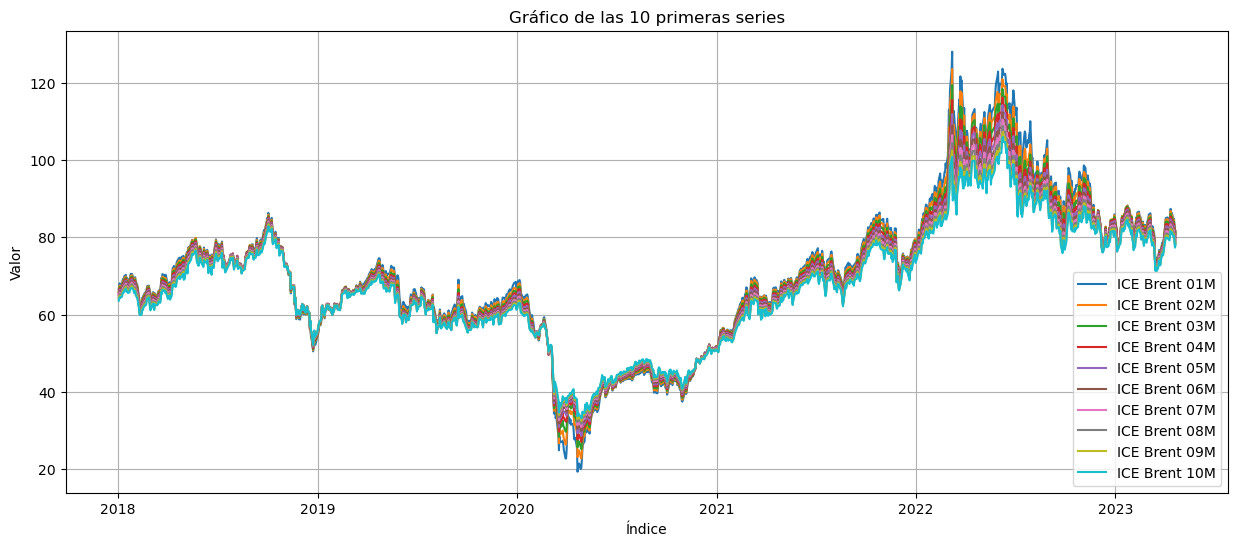

In [14]:
# Obtener las 10 primeras series del DataFrame
series = df.iloc[:,0:10]

# Crear el gráfico
plt.figure(figsize=(15, 6))  # Tamaño de la figura

# Iterar sobre las columnas y trazar cada serie
for col in series.columns:
    plt.plot(series[col], label=col)

plt.xlabel('Índice')  # Etiqueta del eje x
plt.ylabel('Valor')  # Etiqueta del eje y
plt.title('Gráfico de las 10 primeras series')  # Título del gráfico
plt.legend()  # Mostrar leyendas
plt.grid(True)  # Mostrar cuadrícula
plt.show()  # Mostrar el gráfico

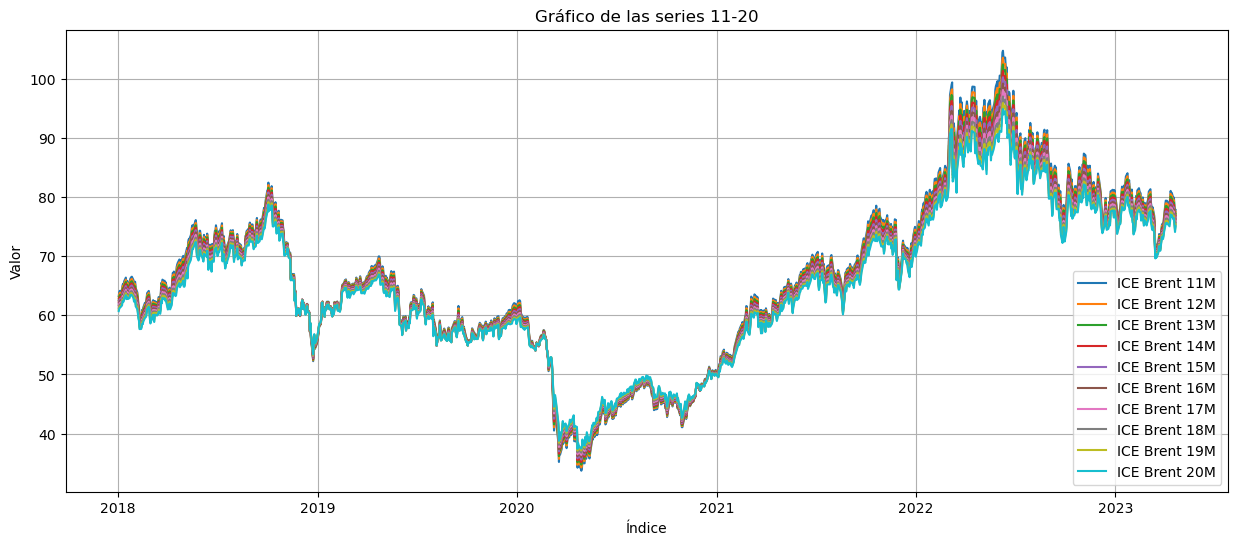

In [15]:
# Obtener las 10 primeras series del DataFrame
series = df.iloc[:,10:20]

# Crear el gráfico
plt.figure(figsize=(15, 6))  # Tamaño de la figura

# Iterar sobre las columnas y trazar cada serie
for col in series.columns:
    plt.plot(series[col], label=col)

plt.xlabel('Índice')  # Etiqueta del eje x
plt.ylabel('Valor')  # Etiqueta del eje y
plt.title('Gráfico de las series 11-20')  # Título del gráfico
plt.legend()  # Mostrar leyendas
plt.grid(True)  # Mostrar cuadrícula
plt.show()  # Mostrar el gráfico

In [22]:
ts = serie_0
ts.head(10)

Fecha
2018-01-02    66.13
2018-01-03    67.29
2018-01-04    67.51
2018-01-05    67.10
2018-01-08    67.31
2018-01-09    68.34
2018-01-10    68.73
2018-01-11    68.77
2018-01-12    69.38
2018-01-15    69.83
Name: ICE Brent 02M, dtype: float64

1
0.00072992700729927


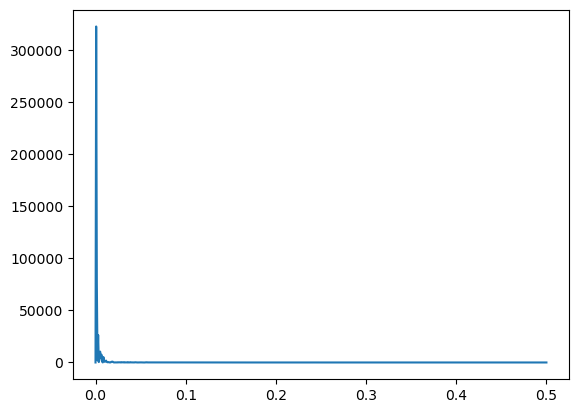

In [18]:
f, Pxx_den=sp.signal.periodogram(serie_0)
plt.plot(f, Pxx_den)
max_index_value = np.argmax(Pxx_den, axis=0)
print(max_index_value)
frecuencia_max=f[max_index_value]
print(frecuencia_max)